## 1. 선형 회귀에 대해 알아보고 데이터를 준비

In [21]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [22]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [23]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

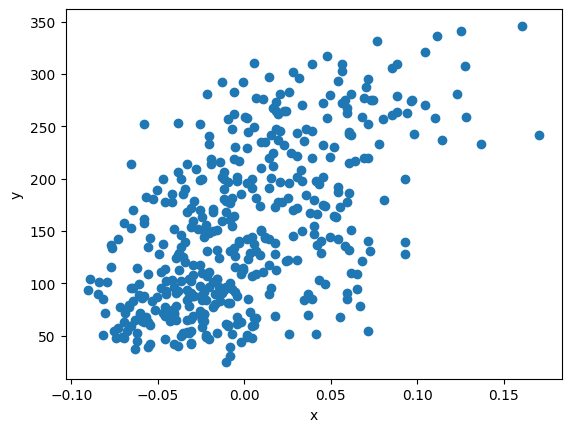

In [24]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [45]:
x = diabetes.data[:, 2]
y = diabetes.target

## 2.경사하강법으로 학습하는 방법

In [46]:
# y_hat = weight * input + bias

"""
    1. 무작위로 w,b를 정한다.
    2. x에서 샘플 하나를 골라 y_hat을 계산한다.
    3. y와 y_hat을 비교하고 차이를 줄이기 위해 w, b를 조정한다.
    4. 다른 전체 x에 대해 적용하고 반복한다.
"""

'\n    1. 무작위로 w,b를 정한다.\n    2. x에서 샘플 하나를 골라 y_hat을 계산한다.\n    3. y와 y_hat을 비교하고 차이를 줄이기 위해 w, b를 조정한다.\n    4. 다른 전체 x에 대해 적용하고 반복한다.\n'

In [58]:
w = 1.0
b = 1.0
y_hat = x[0] * w + b
print("예측 값 : ", y_hat) # 첫 번째 예측값
print("실제 값 : ", y[0]) # 실제 값

예측 값 :  1.0616962065186832
실제 값 :  151.0


In [59]:
w_inc = w + 0.1 # w를 0.1만큼 증가시키기
y_hat_inc = x[0] * w_inc + b
print('w가 조정된 후 : ', y_hat_inc)

w가 조정된 후 :  1.0678658271705517


In [60]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w) # w_rate = 기울기
print("w 증가대비 y_hat 증가율 : ", w_rate)
# w_rate = x[0]
# 변화율이 양수이면 w를 증가시키고, 음수이면 w를 감소시킨다

w 증가대비 y_hat 증가율 :  0.06169620651868429


In [61]:
# 만약 w와 b를 변화율로 업데이트
# 변화율이 양수이던 음수이던 상관없이 w를 업데이트하면 y_hat이 증가한다.
w_new = w + w_rate

In [62]:
# 절편 업데이트
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print("b가 조정된 후 : ", y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print("b증가 대비 y_hat증가", b_rate)
print(b_rate)

b가 조정된 후 :  1.1616962065186833
b증가 대비 y_hat증가 1.0
1.0


In [63]:
# b는 절편이므로 변화율이 1임(그래프 수직이동)
b_new = b + 1
print(b_new)

2.0


In [64]:
# 문제점
# 하지만 y_hat이 y에 한참 미치지 못하는 경우 w,b를 더 큰 폭으로 수정불가
# y_hat이 y보다 커지면 y_hat을 감소시키지 못함

### 오차역전파
변화율만으로 w와 b를 업데이트 하지 않고,  
(y - y_hat)인 오차의 양을 변화율에 곱해서 w를 업데이트한다.  


이 방법을 통해서  
1. 오차가 큰 경우 w, b를 많이 업데이트 가능하고
2. y_hat > y 인 경우 방향도 변경 가능

In [65]:
# w변화율과, b변화율에 오차를 곱해서 w_new, b_new를 업데이트한다.

err = y[0] - y_hat
w_rate = x[0]
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903698 150.9383037934813


In [66]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380547 75.52764127612653


587.8654539985616 99.4093556453094


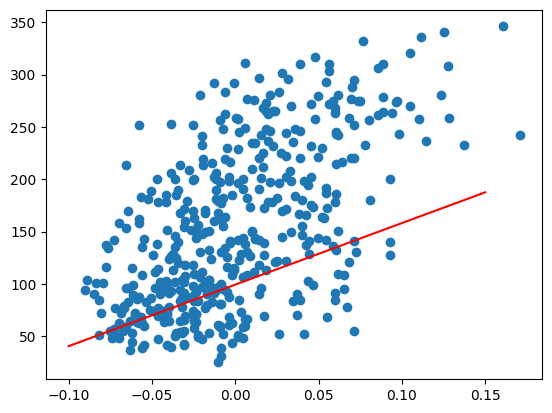

In [73]:
w, b = 1.0, 1.0
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = ( 0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='r')

In [ ]:
w, b = 1.0, 1.0
w_b_history = []

for _ in range(0, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
    w_b_history.append((w, b))

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = ( 0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='r')
plt.show()
print(w, b)

In [81]:
# w,b를 임의의 값(1.0, 1.0)으로 초기화하고 훈련 데이터의 샘플을 하나씩 대입하여 y와 y_hat의 오차를 구한다.
# 1에서 구한 오차를 w와 b의 변화율에 곱한 후 w와 b를 업데이트한다.
# 만약 y_hat이 y보다 커지면 오차는 음수가 되어 w와 b가 줄어든다.
# 반대로 y_hat이 y보다 작으면 오차는 양수가 되어 w와 b가 증가한다.

(913.5973364346786, 123.39414383177173)

### 3. 손실 함수와 경사 하강법의 관계

In [ ]:
# 사실 아까 오차를 변화율에 곱하여 가중치와 절편 업데이트 하는 방법은
# Squared Error 라는 손실함수를 미분한 것과 같다
# 제곱오차를 가중치에 대해 편미분하면 -(y - y_hat) * x
# new_w = w - (-(y - y_hat) * x) = w + (y - y_hat) * x

### 4. 선형 회귀를 위한 뉴런

In [98]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        self.history = [(self.w, self.b)]
    
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
                self.history.append((self.w, self.b))

In [102]:
neuron = Neuron()
neuron.fit(x, y)
neuron.history[-1]

(913.5973364346786, 123.39414383177173)

0 plot
1000 plot
2000 plot
3000 plot
4000 plot
5000 plot
6000 plot
7000 plot
8000 plot
9000 plot
10000 plot
11000 plot
12000 plot
13000 plot
14000 plot
15000 plot
16000 plot
17000 plot
18000 plot
19000 plot
20000 plot
21000 plot
22000 plot
23000 plot
24000 plot
25000 plot
26000 plot
27000 plot
28000 plot
29000 plot
30000 plot
31000 plot
32000 plot
33000 plot
34000 plot
35000 plot
36000 plot
37000 plot
38000 plot
39000 plot
40000 plot
41000 plot
42000 plot
43000 plot
44000 plot


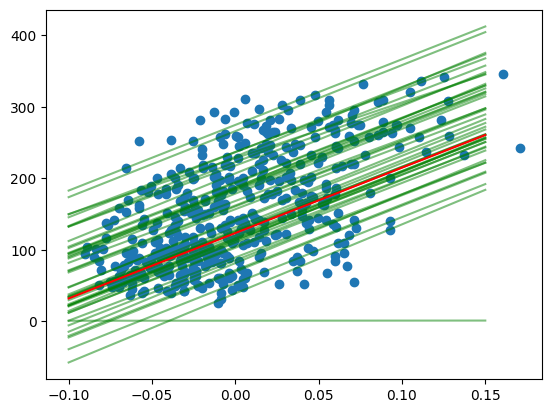

In [110]:
plt.scatter(x, y)
for idx, i in enumerate(neuron.history):
    if idx % (10 * 100) == 0:
        pt1 = (-0.1, -0.1 * i[0] + i[1])
        pt2 = ( 0.15, 0.15 * i[0] + i[1])
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], alpha=0.5, color='g')
        print(idx, 'plot')
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = ( 0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='r')
plt.show()
